In [34]:
%load_ext autoreload
%autoreload 2
from src.data import EarthquakeCatalog, Slab
from src.catalogs import JapanSlowSlipCatalog, ESTEarthquakeCatalog
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
mpl.rcParams.update({'font.size': 8})
mpl.rcParams.update({'figure.dpi': 100})
plt.style.use("tableau-colorblind10")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
slowslip = JapanSlowSlipCatalog()
earthquakes = ESTEarthquakeCatalog()
slab = Slab('kur')

In [54]:
earthquakes.catalog.repeater_idx.hist()

<AxesSubplot: xlabel='time', ylabel='Count'>

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  sc

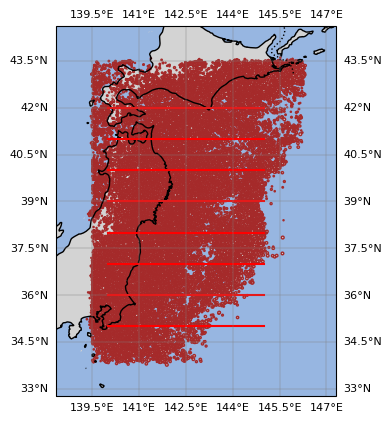

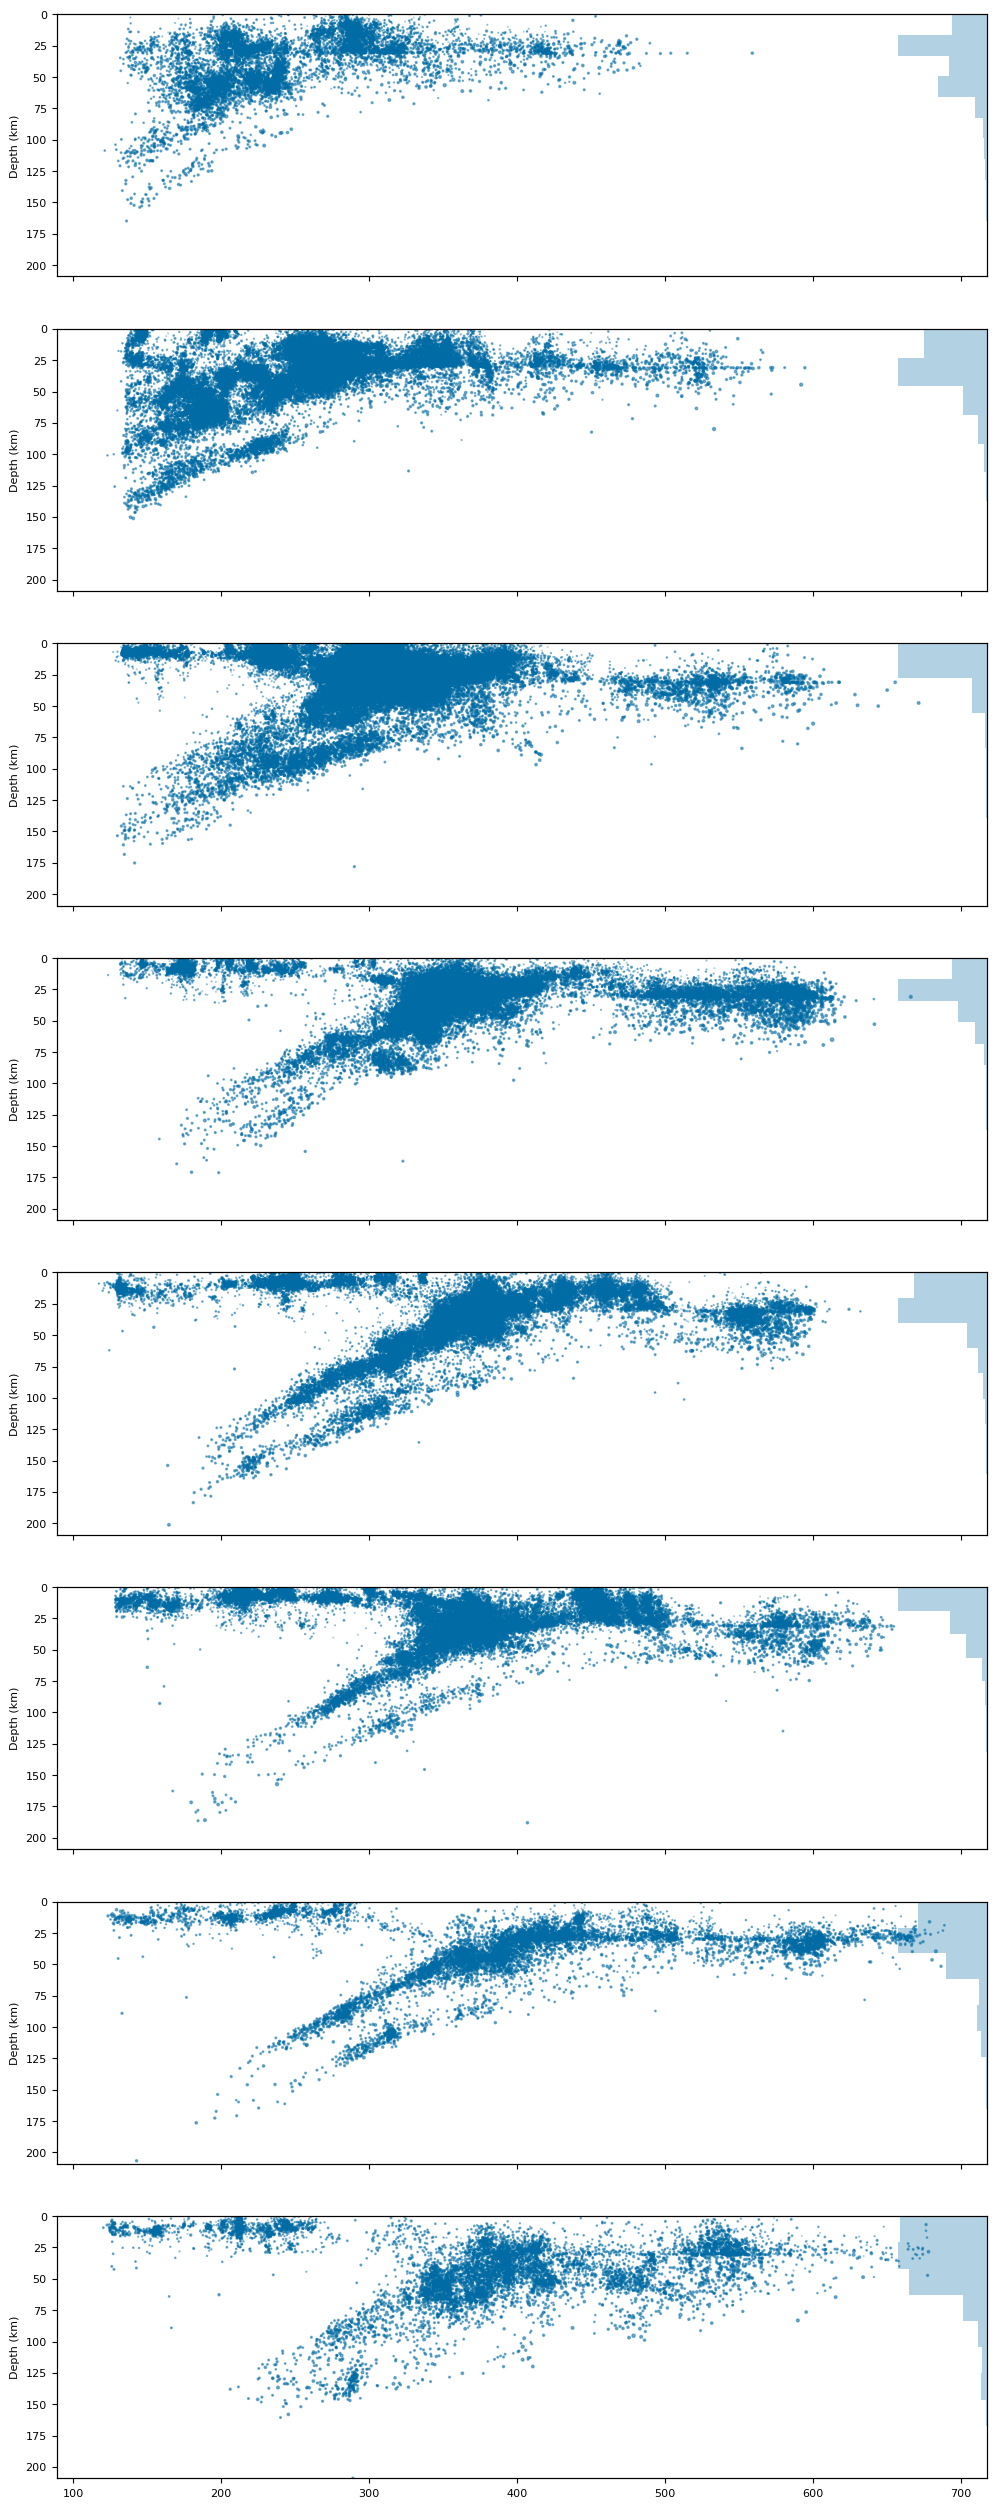

In [36]:
ax = earthquakes.plot_map()

lat_range = range(35, 43)
lon_bounds = [140, 145]
[ax.plot(lon_bounds,[lat,lat],color='r',**{"transform": cartopy.crs.PlateCarree()}) for lat in lat_range] 

fig, AX = plt.subplots(len(lat_range),1,figsize=(12,len(lat_range)*4),sharex=True,sharey=True)
for lat, ax in zip(lat_range, AX):
    earthquakes.plot_depth_cross_section(p1=[138,lat], p2=[143,lat],width_km=50, ax=ax)
    ax.set_xlabel("")

In [37]:
local_earthquakes = earthquakes.intersection(slowslip,buffer_radius_km=100.0)
local_slowslip = slowslip.intersection(earthquakes,buffer_radius_km=10.0)
local_slowslip = local_slowslip.slice_by('lat', 36, 45)

In [38]:
distances = slab.distance(
    local_earthquakes.catalog[['lat','lon','depth']].values,
    from_latlon=True,
    depth_unit="km",
    distance_unit="km"
)
slab_earthquakes = EarthquakeCatalog(local_earthquakes.catalog.loc[distances<10])

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(50.0, 0.0)

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


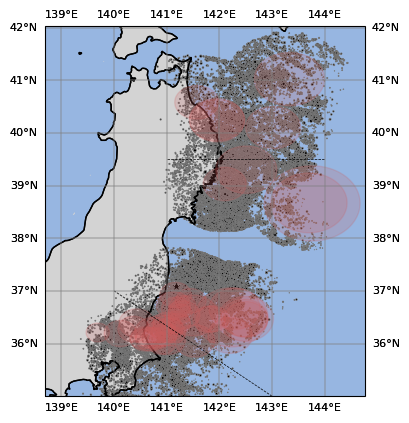

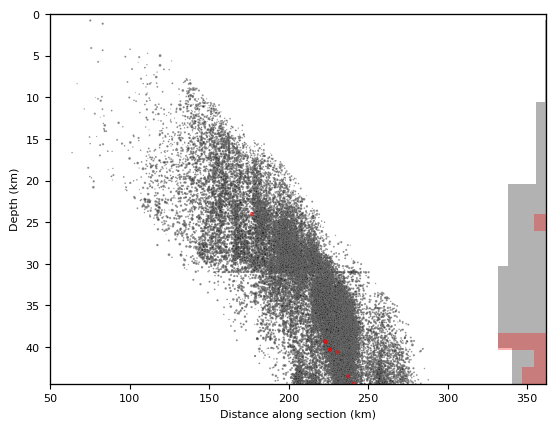

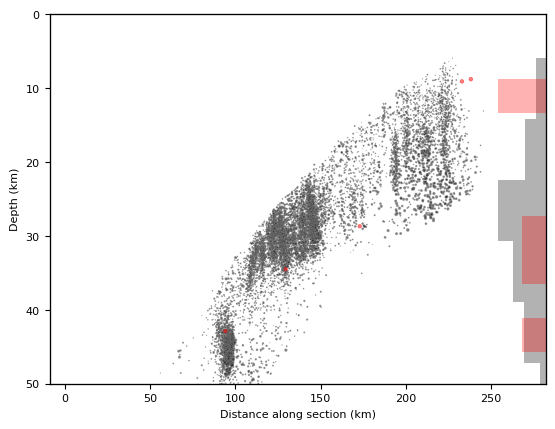

In [39]:
earthquakes_scatter_kwargs = {"c":'k','edgecolor':'grey','linewidth':0.5}
slow_slip_scatter_kwargs = {"c":'red','edgecolor':'red','linewidth':0.5}


p1_A, p2_A = [[143,35],[140,37]]
p1_B, p2_B = [[141,39.5],[144,39.5]]


ax = slab_earthquakes.plot_map(scatter_kwarg=earthquakes_scatter_kwargs, k_largest_events=1)
local_slowslip.plot_map(ax=ax)
ax.plot([p1_A[0],p2_A[0]],[p1_A[1],p2_A[1]],'k--',linewidth=0.5, **{"transform": cartopy.crs.PlateCarree()})
ax.plot([p1_B[0],p2_B[0]],[p1_B[1],p2_B[1]],'k--',linewidth=0.5, **{"transform": cartopy.crs.PlateCarree()})

ax = slab_earthquakes.plot_depth_cross_section(p1_A, p2_A, width_km=100, kwargs=earthquakes_scatter_kwargs, k_largest_events=1)
local_slowslip.plot_depth_cross_section(p1_A, p2_A, width_km=20, kwargs=slow_slip_scatter_kwargs, ax=ax)

ax = slab_earthquakes.plot_depth_cross_section(p1_B, p2_B, width_km=20, kwargs=earthquakes_scatter_kwargs, k_largest_events=1)
local_slowslip.plot_depth_cross_section(p1_B, p2_B, width_km=100, kwargs=slow_slip_scatter_kwargs, ax=ax)
ax.set_ylim([50,0])


**Notes on the spatial relationship between slow slip and seismicity in the southern japan trench:**

Slow slip events centroids span depths of 7-60 km. The depth distribution is bimodal. Events an updip cluster around 10 km; events downdip cluster around 40 km. 

Most seismicity in SNET catalog is shallow and in the upper crust. A zone of seismicity seems to delineate the downgoing slab. Along this zone of seismicity, shallow slow slip events seem complementary to the earthquakes. In contrast the deeper slow slip events occur in the same location as the deeper seismicity.

Questions:
- Is the seismicity on the plate interface, or in the upper crust?
- Is the evidence sufficient to suggest two distinct populations if slow slip events?
- Is the spatio-temporal relationship between seismicity and slow slip differenct for the updip and downdip cluster?

In [40]:
slab_earthquakes.start_time, slab_earthquakes.end_time

(Timestamp('2016-08-15 00:02:43.831000'),
 Timestamp('2020-08-31 23:52:44.943000'))

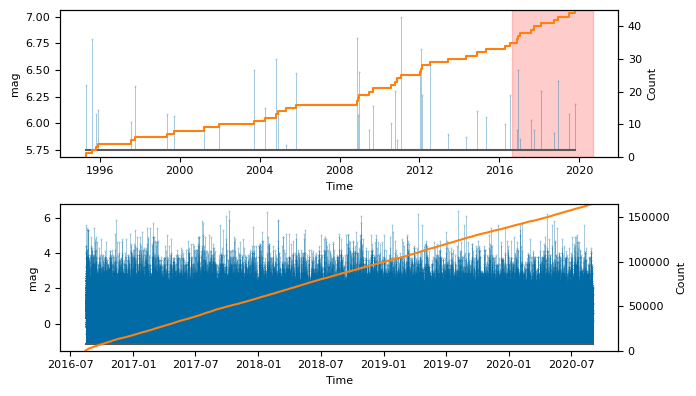

In [41]:
fig, AX = plt.subplots(2,1,figsize=(7,4))
ax = local_slowslip.plot_time_series(ax=AX[0])
ax.axvspan(slab_earthquakes.start_time, slab_earthquakes.end_time, alpha=0.2, color='red')
slab_earthquakes.plot_time_series(ax=AX[1])

plt.tight_layout()

<AxesSubplot: xlabel='Time', ylabel='mag'>

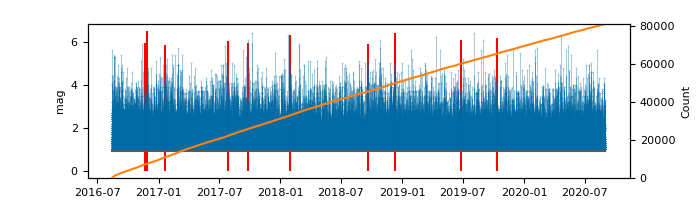

In [49]:
%matplotlib widget
complete_slab_eathquakes = slab_earthquakes.get_time_slice('2016-08-15','2020-08-31')
SNET_slow_slip = local_slowslip.get_time_slice('2016-08-15','2020-08-31')
complete_slab_eathquakes.mag_completeness = 1.0
fig, ax = plt.subplots(figsize=(7,2),sharex=True)
ax.stem(SNET_slow_slip.catalog.time, SNET_slow_slip.catalog.mag, markerfmt=' ', linefmt='r-', basefmt=' ')
complete_slab_eathquakes.plot_time_series(ax=ax)


In [43]:
%matplotlib inline
import src    
from src.data import AllSlabs
import seaborn as sns
import numpy as np

In [44]:
all_slabs = AllSlabs()

In [45]:
T = 500
R = 40

dt, _, w =  src.center_sequences(
    slowslipevents = SNET_slow_slip,
    earthquakes = complete_slab_eathquakes,
    time_window = T,
    space_window = R,
    lag=0,
    concatenate_output = True,
    return_indices = False,
    slab_model=all_slabs,
)


[(-240.0, 240.0)]

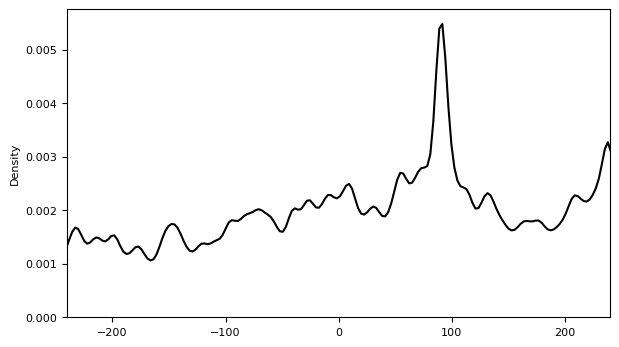

In [46]:
fig, ax = plt.subplots(figsize=(7,4))

data_std = np.std(dt)
smoothing_bandwidth = 5
bw = smoothing_bandwidth/data_std

sns.kdeplot(
    x=dt,
    label=f"Global stack", 
    ax=ax,
    color='k',
    bw_method=bw,
    weights=w,
)
ax.set(
    xlim=[-(T/2-10),(T/2-10)],
)

In [47]:
dt, _, w =  src.center_sequences(
    slowslipevents = SNET_slow_slip,
    earthquakes = complete_slab_eathquakes,
    time_window = T,
    space_window = R,
    lag=0,
    concatenate_output = False,
    return_indices = False,
    slab_model=all_slabs,
)


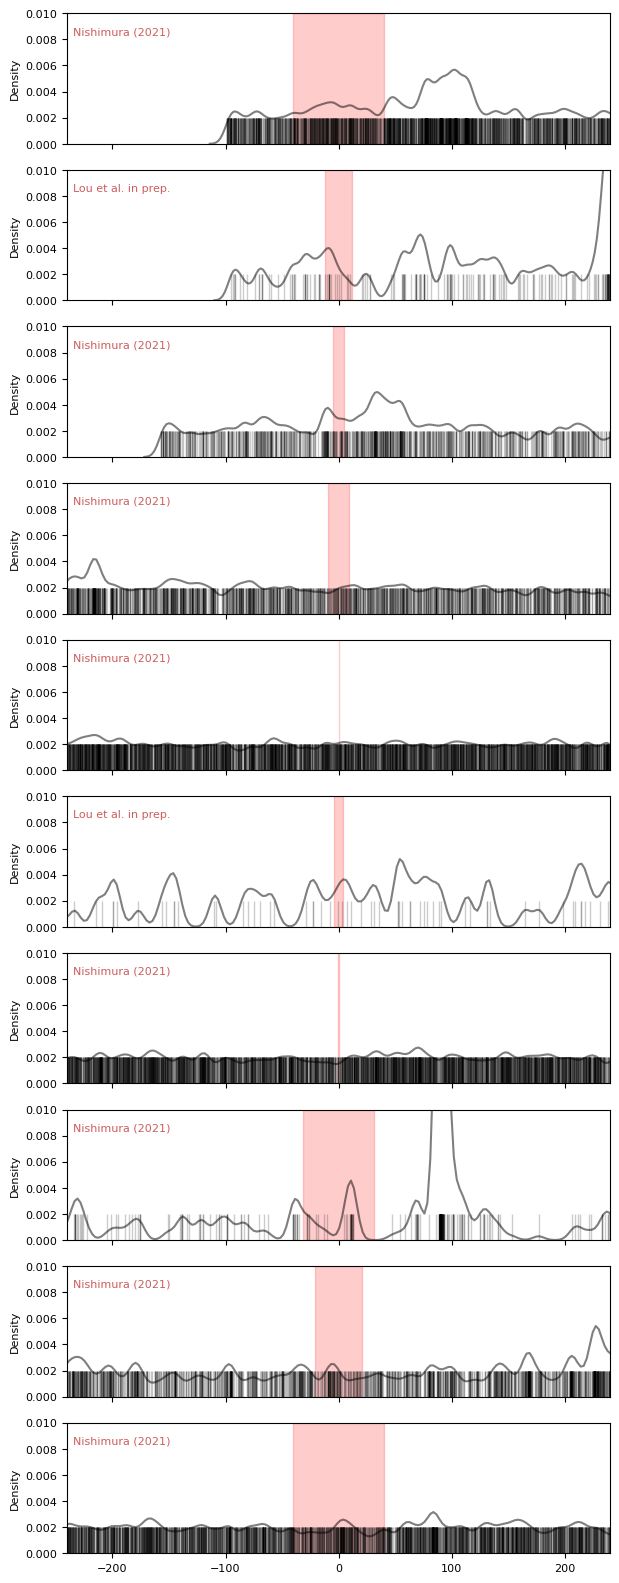

In [48]:
fig, AX = plt.subplots(len(dt),1, figsize=(7,20), sharex=True)
for i, (i_dt, iax) in enumerate(zip(dt, AX)):
    
    data_std = np.std(i_dt)
    smoothing_bandwidth = 5
    bw = smoothing_bandwidth/data_std
    sns.kdeplot(
        x=i_dt,
        label=f"Global stack", 
        ax=iax,
        color='k',
        bw_method=bw,
        alpha=0.5,
    )
    
    sns.rugplot(
        x=i_dt,
        ax=iax,
        color='k',
        height=0.2,
        alpha=0.2,
    )
    
    sse_duration = SNET_slow_slip.catalog.duration.values[i]/60/60/24
    
    iax.axvspan(-sse_duration/2, sse_duration/2, alpha=0.2, color='red')
    iax.set(
        xlim=[-(T/2-10),(T/2-10)],
        ylim = [0,0.01]
    )
    
    iax.text(0.01,0.9,SNET_slow_slip.catalog.ref.values[i],transform=iax.transAxes, ha='left', va='top', color='indianred')